In [2]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
%matplotlib inline
import os

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
img = cv2.imread('/Users/joannakang/Desktop/Emoticon/Apeach/1.jpg')
img2 = load_img('/Users/joannakang/Desktop/Emoticon/Apeach/1.jpg')

In [4]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

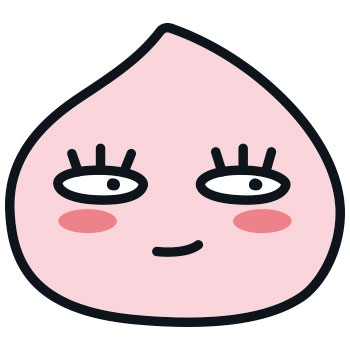

In [5]:
img2

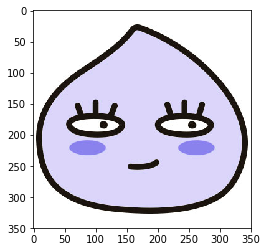

In [6]:
plt.imshow(img, cmap = 'Greys')

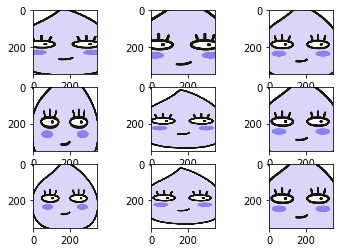

In [7]:
#이미지를 array로 바꾸고 싶을 때는, np.array or img_to_array
data = img_to_array(img) 
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range = [0.5, 1.0])
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

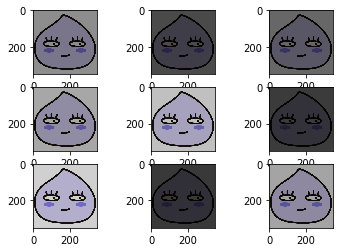

In [8]:
#명암정보를 바꿔보기
data = img_to_array(img) 
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range = [0.2, 1.0])
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

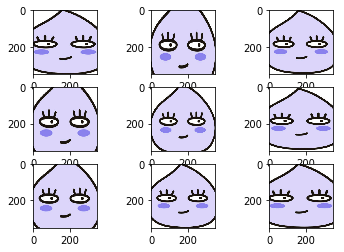

In [14]:
datagen = ImageDataGenerator(zoom_range = [0.5, 1.0])
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [15]:
img = load_img('/Users/joannakang/Desktop/Emoticon/Apeach/1.jpg')

In [16]:
x = img_to_array(img) #이미지를 array로 바꿈
x = x.reshape((1,) + x.shape)

In [17]:
i = 0
for batch in datagen.flow(x, batch_size= 32,
                          save_to_dir= '/Users/joannakang/Desktop/Emoticon/new/', save_prefix='apeach', save_format='jpg'):
    i += 1
    if i > 50:
        break  # 이미지 50장을 생성하고 마칩니다